# Machine Learning

This tutorial uses [scikit-learn](https://scikit-learn.org/stable/), an open source machine learning (ML) framework based on numpy, scipy and matplotlib.

In [1]:
# For visualization
import matplotlib.pyplot as plt

# additional functionality
import numpy as np

import warnings
# Suppress warnings from early terminated training
warnings.filterwarnings("ignore")

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

## Task: Recognition of handwritten numbers

A widely used example for the use of machine learning is the recognition of handwritten numbers, for which we will build, train and assess the accuracy of a machine learning model. The example is so common in fact that sklearn, like many other ML frameworks, come with a built-in data set of handwritten numbers.

In [2]:
# Loading a data set containing 1797 8 x 8 images of digits
digits = datasets.load_digits()

print(type(digits.images))
print(digits.images.shape)

<class 'numpy.ndarray'>
(1797, 8, 8)


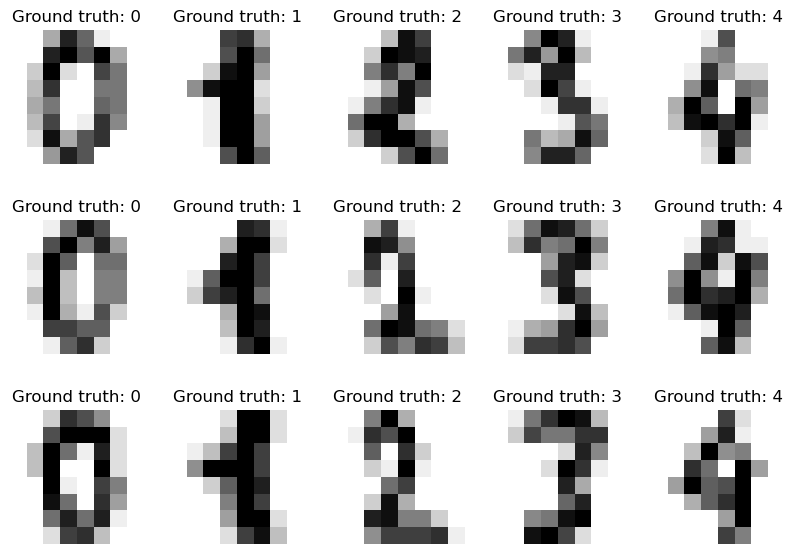

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 7))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.set_axis_off()
        ax.imshow(
            digits.images[i * 10 + j], cmap=plt.cm.gray_r, interpolation="nearest"
        )
        ax.set_title(f"Ground truth: {digits.target[i * 10 + j]}")

## Splitting the dataset

For ML applications the data is always split in at least two datasets, since for proper evaluation of the performance of the trained model unseen data is required. Whether additional separation of the data set is required depends on the ML model applied, as well as the optimization algorithm.

In [4]:
# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 80% train and 20% test subsets, which is a standard ratio
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=True
)

## Pick the model

In order to make an educated choice for the model to be applied, it helps to understand the structure of the data at hand. This is, however, a rather vague statement, which should encourage you to play around with models sometimes. There are three basic approaches, depending on the type of data you have, which are [supervised, unsupervised and reinforcement learning](https://en.wikipedia.org/wiki/Machine_learning#Approaches). With annotated data at hand, we can apply techniques from the supervised learning approach. For the actual model, one can pick from a vast zoo, with common ones being
- [Neural Network (NN)](https://en.wikipedia.org/wiki/Neural_network_(machine_learning))
- [Support Vector Machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine)
- [Decision Tree models, especially Random Forest](https://en.wikipedia.org/wiki/Random_forest)
- [Naive Bayes (NB)](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
- [Linear Regression](https://en.wikipedia.org/wiki/Regression_analysis#Linear_regression)
- [K-Nearest Neighbors (KNN)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).
  
With a rather modest amount of data at hand to solve a classification type problem, it makes sense to use an SVM, since they can make use of different kernels, projecting lower dimensional parameter spaces into higher order ones and therefore saving a lot on the parameters to fit. NNs are more flexible in their basic form, which comes with the price of more parameters to fit.

In [5]:
# Create SVM classifier with a radial basis function (RBF) kernel
my_classifier = svm.SVC(gamma=0.001)

## Train the model

In [6]:
# Train the model on the train subset
my_classifier.fit(X_train, y_train)

# Remember to save your model to a file, if you want to use it again!!!
# This can be achieved e.g. by pickling my_classifier
# import pickle

# save
# with open('my_model.pkl','wb') as f:
#    pickle.dump(my_classifier,f)

# load
# with open('my_model.pkl', 'rb') as f:
#    my_classifier = pickle.load(f)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Assess the accuracy

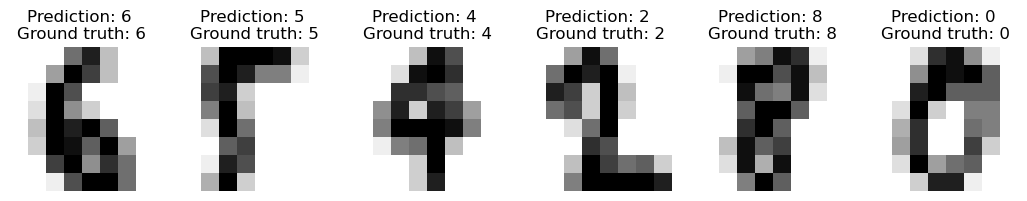

In [7]:
# Predict the value of the digit on the test subset
predicted = my_classifier.predict(X_test)

# Plot some predictions
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(13, 3))
for ax, image, prediction, GroundTruth in zip(axes, X_test, predicted, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction} \nGround truth: {GroundTruth}")

In [8]:
# Show how the classifier performs for the individual numbers
print(
    f"Classification report for classifier {my_classifier}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        43
           3       0.97      1.00      0.99        36
           4       1.00      1.00      1.00        31
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.98      1.00      0.99        41
           8       0.97      0.95      0.96        39
           9       1.00      0.89      0.94        37

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360




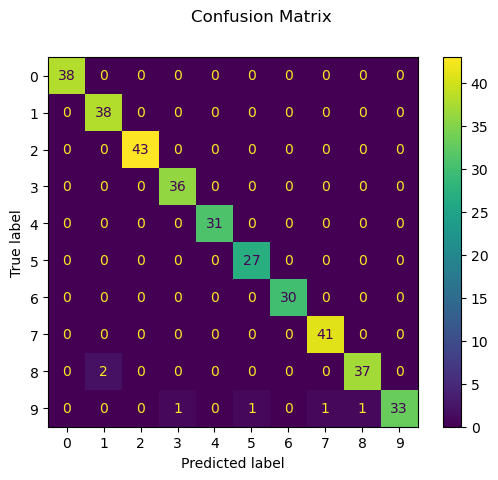

In [9]:
# Show confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
# uncomment to show it as 2D array
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [10]:
# amount of coefficients to be fitted for the SVM used here
# 45 * 8 * 8 + 45
print(
    f"The amount of coefficients used by the SVM model are "
    f"{np.prod(my_classifier._get_coef().shape) + len(my_classifier.intercept_)}"
)

# amount of coefficients to be fitted for the NN from the previous notebook
# bias of first layer 28 * 28, hidden layer 512, and output layer 10
# connections 28 * 28 * 512 + 512 * 10
print(
    f"The amount of coefficients used by the NN model of the previous "
    f"notebook are {28 * 28 + 512 + 10 + 28 * 28 * 512 + 512 * 10}"
)
# adapted to the problem at hand with 8 x 8 images
print(
    f"The amount of coefficients used by an NN model for this problem inspired "
    f"by the previous notebook are {8 * 8 + 512 + 10 + 8 * 8 * 512 + 512 * 10}"
)

The amount of coefficients used by the SVM model are 2925
The amount of coefficients used by the NN model of the previous notebook are 407834
The amount of coefficients used by an NN model for this problem inspired by the previous notebook are 38474


The SVM has an accuracy of 0.9833333333333333, while the NN has an accuracy of 0.9805555555555555


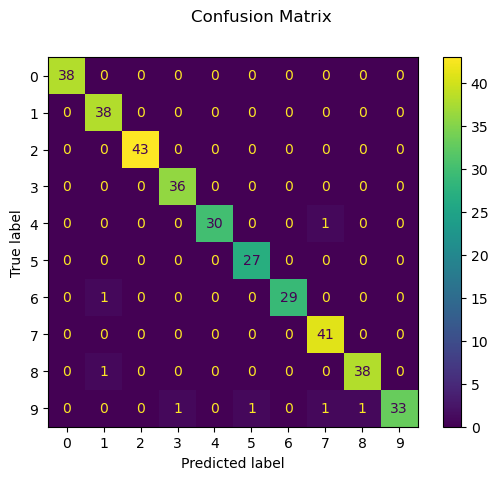

In [11]:
# build a NN with similar amount of parameters than SVM and compare performance
from sklearn.neural_network import MLPClassifier

my_nn_classifier = MLPClassifier(hidden_layer_sizes=(45))
my_nn_classifier.fit(X_train, y_train)
my_nn_prediction = my_nn_classifier.predict(X_test)

print(
    f"The SVM has an accuracy of {metrics.accuracy_score(y_test, predicted)}, "
    f"while the NN has an accuracy of {metrics.accuracy_score(y_test, my_nn_prediction)}"
)

nn_disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, my_nn_prediction)
nn_disp.figure_.suptitle("Confusion Matrix")
plt.show()

As can be seen the overall accuracy is very good, with the confusion matrix showing which numbers have been confused with each other how often.
It is also interesting to see how the model performance improved over the training iterations, so-called epochs.

max_epoch accuracy
0 0.10277777777777777
1 0.6583333333333333
2 0.825
5 0.9388888888888889
10 0.9805555555555555
20 0.9916666666666667
50 0.9861111111111112
100 0.9833333333333333
200 0.9833333333333333


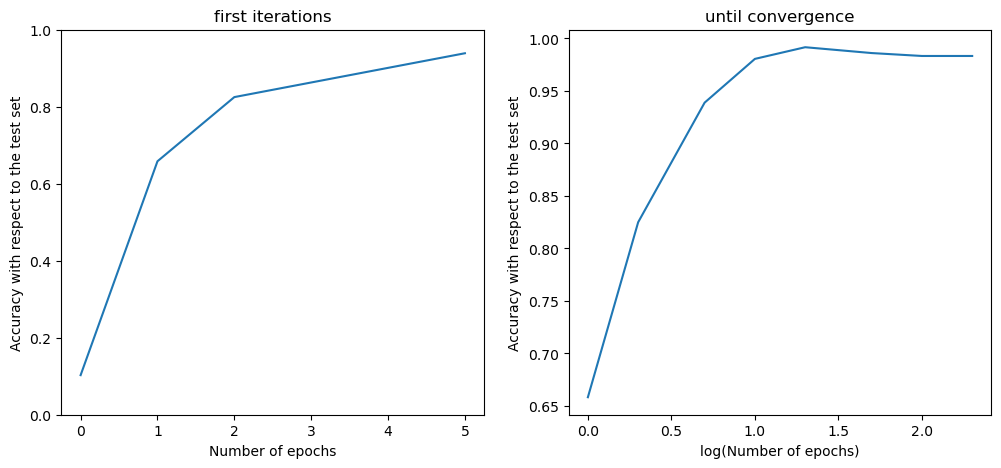

In [12]:
MaxIters = np.array([0, 1, 2, 5, 10, 20, 50, 100, 200])
accuracies = []

for it in MaxIters:
    my_classifier = svm.SVC(gamma=0.001, max_iter=it)
    my_classifier.fit(X_train, y_train)
    predicted = my_classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    accuracies.append(acc)

print("max_epoch", "accuracy")
for mi, ac in zip(MaxIters, accuracies):
    print(mi, ac)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].set_title("first iterations")
axes[1].set_title("until convergence")
axes[0].plot(MaxIters[:4], accuracies[:4])
axes[1].plot(np.log10(MaxIters[1:]), accuracies[1:])
axes[0].set_xlabel("Number of epochs")
axes[1].set_xlabel("log(Number of epochs)")
axes[0].set_ylim(0, 1)
for ax in axes:
    ax.set_ylabel("Accuracy with respect to the test set")

One can also investigate how the performance differs when using more or less data.

Text(0.5, 1.0, 'Learning Curve for SVC')

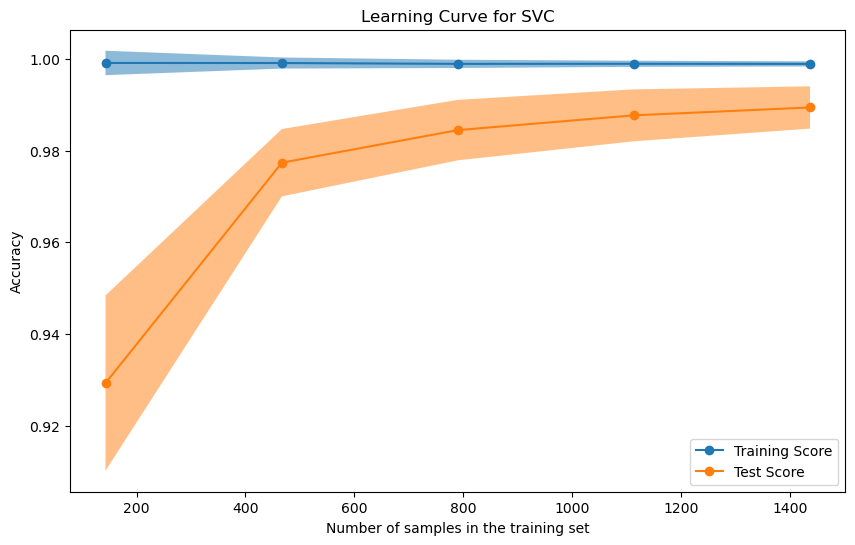

In [13]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

# start from untrained model again
my_classifier = svm.SVC(kernel="rbf", gamma=0.001)

common_params = {
    "X": np.concatenate((X_train, X_test), axis=0),
    "y": np.concatenate((y_train, y_test), axis=0),
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)
LearningCurveDisplay.from_estimator(my_classifier, **common_params, ax=ax)
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.set_title(f"Learning Curve for {my_classifier.__class__.__name__}")

## Comparison between classifier models

Now one can start comparing the performance between different models, as e.g. done here with a naive Bayes classifier:

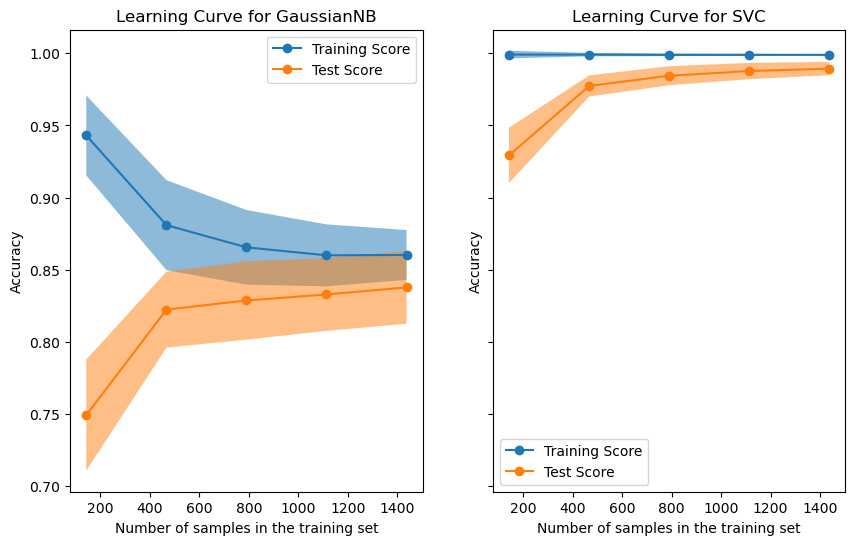

In [14]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

for ax_idx, estimator in enumerate([naive_bayes, my_classifier]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

## Additional Material

In order to make an educated decision on which model to pick, you should read through additional material, starting with [very short summaries](https://www.coursera.org/articles/machine-learning-algorithms). YouTube also offers comprehensive introductions, like the one from scikit-learn itself.

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("playlist?list=PL2okA_2qDJ-m44KooOI7x8tu85wr4ez4f")

You can also use ChatGPT to get familiar with which machine learning solution fits your kind of problem considering the data and computational resources you have at hand. You should also watch out for comparisons between models like [this](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py), to get a glimpse of how the numerical trends differ between the methods.